In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import talib
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import confusion_matrix
import talib
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

In [44]:
pip install seaborn


  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.6 kB ? eta -:--:--
   ----- --------------------------------- 41.0/294.6 kB 326.8 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/294.6 kB 804.6 kB/s eta 0:00:01
   ---------------------- --------------- 174.1/294.6 kB 876.1 kB/s eta 0:00:01
   ------------------------------------- -- 276.5/294.6 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 294.6/294.6 kB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [8]:
import ta


In [9]:
df = pd.read_csv('prices-split-adjusted.csv')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


In [11]:
df.isna().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [12]:
ADL = ta.volume.acc_dist_index(df['high'], df['low'], df['close'], df['volume'])
short_window_adl = ADL.rolling(window=3).mean()
long_window_adl = ADL.rolling(window=10).mean()
df['ADOSC'] = short_window_adl - long_window_adl

In [13]:
df['ADOSC'] = short_window_adl - long_window_adl


In [14]:
df.head(20)

,date,symbol,open,close,low,high,volume,ADOSC
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0,NaN
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0,NaN
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0,NaN
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0,NaN
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0,NaN
5,2016-01-12,WLTW,115.510002,115.550003,114.500000,116.059998,1098000.0,NaN
6,2016-01-13,WLTW,116.459999,112.849998,112.589996,117.070000,949600.0,NaN
7,2016-01-14,WLTW,113.510002,114.379997,110.050003,115.029999,785300.0,NaN
8,2016-01-15,WLTW,113.330002,112.529999,111.919998,114.879997,1093700.0,NaN
9,2016-01-19,WLTW,113.660004,110.379997,109.870003,115.870003,1523500.0,-1.137460e+06


In [15]:
df["TP"] = (df["low"] + df["close"] + df["high"])/3
df["std"] = df["TP"].rolling(20).std(ddof = 0)
df["movingavg"] = df["TP"].rolling(20).mean()
df["BOLU"] = df["movingavg"] + 2*df["std"]
df["BOLD"] = df["movingavg"] - 2*df["std"]

In [16]:
df.head(25)

,date,symbol,open,close,low,high,volume,ADOSC,TP,std,movingavg,BOLU,BOLD
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0,NaN,124.799998,NaN,NaN,NaN,NaN
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0,NaN,121.820002,NaN,NaN,NaN,NaN
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0,NaN,116.539998,NaN,NaN,NaN,NaN
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0,NaN,115.853335,NaN,NaN,NaN,NaN
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0,NaN,115.463333,NaN,NaN,NaN,NaN
5,2016-01-12,WLTW,115.510002,115.550003,114.500000,116.059998,1098000.0,NaN,115.370000,NaN,NaN,NaN,NaN
6,2016-01-13,WLTW,116.459999,112.849998,112.589996,117.070000,949600.0,NaN,114.169998,NaN,NaN,NaN,NaN
7,2016-01-14,WLTW,113.510002,114.379997,110.050003,115.029999,785300.0,NaN,113.153333,NaN,NaN,NaN,NaN
8,2016-01-15,WLTW,113.330002,112.529999,111.919998,114.879997,1093700.0,NaN,113.109998,NaN,NaN,NaN,NaN
9,2016-01-19,WLTW,113.660004,110.379997,109.870003,115.870003,1523500.0,-1.137460e+06,112.040001,NaN,NaN,NaN,NaN


In [17]:
df['MEDPRICE'] = talib.MEDPRICE(df['high'], df['low'])

In [51]:
[df['symbol']]

[19        WLTW
 20        WLTW
 21        WLTW
 22        WLTW
 23        WLTW
           ... 
 851259     ZBH
 851260    ZION
 851261     ZTS
 851262     AIV
 851263     FTV
 Name: symbol, Length: 851245, dtype: object]

In [26]:
df1 = df
df1.head()

,date,symbol,open,close,low,high,volume,ADOSC,TP,std,movingavg,BOLU,BOLD,MEDPRICE
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0,NaN,124.799998,NaN,NaN,NaN,NaN,124.279999
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0,NaN,121.820002,NaN,NaN,NaN,NaN,122.740002
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0,NaN,116.539998,NaN,NaN,NaN,NaN,117.334999
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0,NaN,115.853335,NaN,NaN,NaN,NaN,115.470001
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0,NaN,115.463333,NaN,NaN,NaN,NaN,115.709999


In [53]:
df = df.dropna()
df = df[df['symbol'] == 'GOOG']

In [54]:
# Discretizing 'close' column
n_bins = 10  # Change this based on your preference
bin_discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
df['close_binned'] = bin_discretizer.fit_transform(df[['close']])

D:\NOT THE RADBRAD\condamin\envs\env\lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


In [55]:

X = df.drop(columns=['date', 'symbol', 'close', 'close_binned'])
y = df['close_binned']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
# Train GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [92]:
# Predict
y_pred_class = gnb.predict(X_test)

In [93]:
# Convert predicted class back to 'close' value
bin_centers = bin_discretizer.bin_edges_[0][:-1] + np.diff(bin_discretizer.bin_edges_[0])/2
y_pred = bin_centers[y_pred_class.astype(int)]

In [94]:

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 464.26972268379006


In [95]:
accuracy = accuracy_score(y_test, y_pred_class)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 38.81%


In [96]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_class)

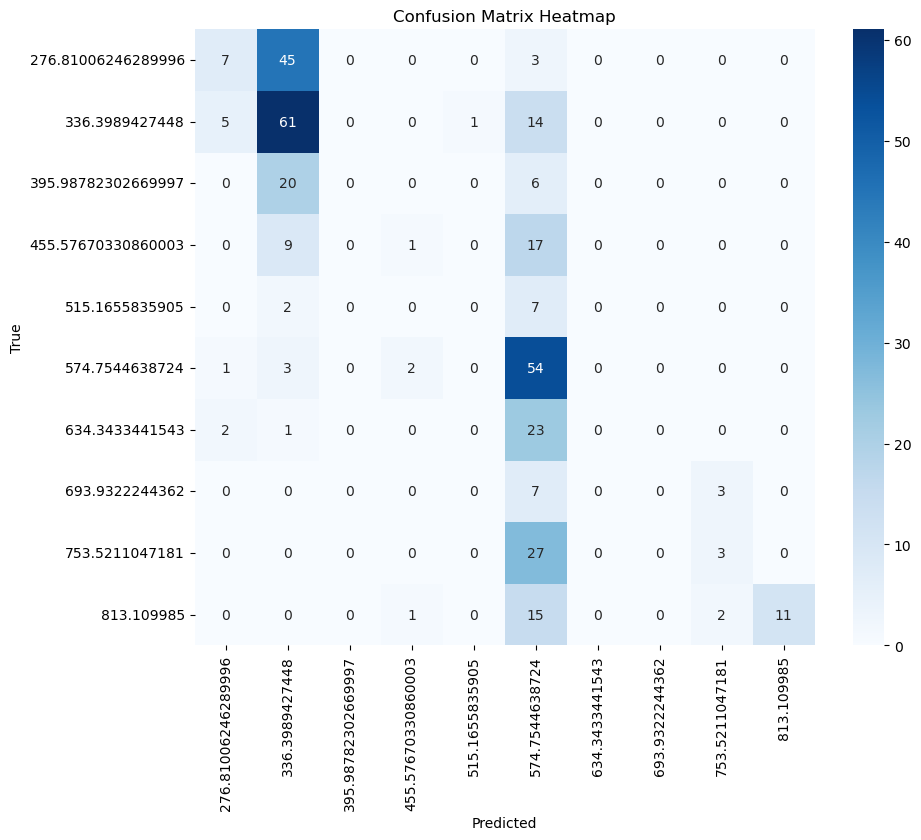

In [97]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', 
            xticklabels=bin_discretizer.bin_edges_[0][1:], 
            yticklabels=bin_discretizer.bin_edges_[0][1:])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()

### Since this model has shown very little accuracy we will not be continuing this model anymore

# LINEAR REGRESSION MODEL

In [246]:
df = df1
df = df[df['symbol'] == 'GOOG']
df.head()

,date,symbol,open,close,low,high,volume,ADOSC,TP,std,movingavg,BOLU,BOLD,MEDPRICE
439,2010-01-04,GOOG,312.304948,312.205308,310.955001,313.580158,3927000.0,3.530349e+06,312.246822,67.462673,46.691941,181.617288,-88.233405,312.267579
907,2010-01-05,GOOG,312.419511,310.830459,309.610028,312.748278,6031900.0,-4.170257e+06,311.062922,67.360717,46.809126,181.530561,-87.912308,311.179153
1375,2010-01-06,GOOG,311.761979,302.994813,302.048370,311.761979,7987100.0,-1.045622e+07,305.601720,66.361095,46.788682,179.510873,-85.933508,306.905174
1843,2010-01-07,GOOG,303.562685,295.941242,295.218951,303.861575,12876600.0,4.601408e+07,298.340589,65.004425,46.679207,176.688057,-83.329642,299.540263
2311,2010-01-08,GOOG,294.895159,299.886470,293.455551,300.499172,9483900.0,2.897011e+07,297.947064,64.810001,46.714431,176.334432,-82.905571,296.977361


In [247]:
df.info

<bound method DataFrame.info of               date symbol        open       close         low        high  \
439     2010-01-04   GOOG  312.304948  312.205308  310.955001  313.580158   
907     2010-01-05   GOOG  312.419511  310.830459  309.610028  312.748278   
1375    2010-01-06   GOOG  311.761979  302.994813  302.048370  311.761979   
1843    2010-01-07   GOOG  303.562685  295.941242  295.218951  303.861575   
2311    2010-01-08   GOOG  294.895159  299.886470  293.455551  300.499172   
...            ...    ...         ...         ...         ...         ...   
848963  2016-12-23   GOOG  790.900024  789.909973  787.280029  792.739990   
849463  2016-12-27   GOOG  790.679993  791.549988  787.656982  797.859985   
849963  2016-12-28   GOOG  793.700012  785.049988  783.200012  794.229980   
850463  2016-12-29   GOOG  783.330017  782.789978  778.919983  785.929993   
850963  2016-12-30   GOOG  782.750000  771.820007  770.409973  782.780029   

            volume         ADOSC          T

In [248]:
X = df.drop(columns=['date', 'symbol', 'close'])
y = df['close']

In [249]:
X = X.dropna()
y = y[X.index]#synchronise our rows as we have removed the column with NaN

In [250]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [251]:
model1 = LinearRegression()
model1.fit(X_train,y_train)

LinearRegression()

In [256]:
y_pred_linear = model1.predict(X_test)
y_pred_linear

array([509.46626686, 310.96995476, 262.44673918, 349.07716708,
       761.679993  , 356.26025461, 563.07664508, 267.83654936,
       605.12786869, 716.549988  , 715.090027  , 666.099976  ,
       340.20541757, 360.48444381, 532.3408492 , 296.34474664,
       303.72210897, 432.53449403, 295.8764838 , 282.68590931,
       241.60481484, 290.77060988, 533.05893171, 305.12186086,
       543.45039693, 288.21518523, 296.53902144, 768.23999   ,
       339.62259164, 710.359985  , 794.559998  , 309.7544986 ,
       534.63456081, 297.63490978, 411.11474899, 242.59610374,
       758.880005  , 269.63977492, 530.700012  , 266.00839075,
       682.73999   , 300.06579175, 710.830017  , 289.15168002,
       523.07628107, 249.08180226, 580.38916256, 776.219971  ,
       314.24269573, 538.3045    , 531.690002  , 265.25622256,
       258.2424778 , 573.48806951, 302.26754703, 592.86881463,
       304.95746256, 643.780029  , 279.63234582, 320.11068706,
       635.97998   , 264.65346882, 433.48096791, 302.64

In [257]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 4.221862749975538e-09


In [260]:
df_subset = df.iloc[-len(y_pred_linear):].copy()
df_subset['predicted_close_linear'] = y_pred_linear
df.update(df_subset)
df_subset

,date,symbol,open,close,low,high,volume,ADOSC,TP,std,movingavg,BOLU,BOLD,MEDPRICE,predicted_close_linear
675307,2015-08-10,GOOG,639.479980,633.729980,631.249023,643.440002,1809200.0,7.675631e+06,636.139668,132.876188,81.393317,347.145692,-184.359059,637.344513,509.466267
675804,2015-08-11,GOOG,669.200012,660.780029,654.270020,674.900024,5029200.0,-1.236273e+07,663.316691,138.613523,82.327835,359.554880,-194.899210,664.585022,310.969955
676301,2015-08-12,GOOG,663.080017,659.559998,652.289978,665.000000,2936700.0,2.807722e+07,658.949992,137.735174,81.867166,357.337515,-193.603182,658.644989,262.446739
676798,2015-08-13,GOOG,659.322021,656.450012,651.661011,664.500000,1810700.0,-6.593631e+06,657.537008,137.481119,81.827684,356.789922,-193.134554,658.080506,349.077167
677295,2015-08-14,GOOG,655.010010,657.119995,652.659973,659.854980,1072100.0,1.783698e+07,656.544983,137.270288,81.884749,356.425324,-192.655826,656.257476,761.679993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848963,2016-12-23,GOOG,790.900024,789.909973,787.280029,792.739990,623400.0,4.976139e+06,789.976664,165.566642,88.966833,420.100117,-242.166450,790.010010,302.128082
849463,2016-12-27,GOOG,790.679993,791.549988,787.656982,797.859985,789100.0,-5.814443e+06,792.355652,166.022547,89.308116,421.353209,-242.736977,792.758484,426.332732
849963,2016-12-28,GOOG,793.700012,785.049988,783.200012,794.229980,1132700.0,-1.558623e+07,787.493327,165.005655,88.722833,418.734143,-241.288478,788.714996,436.559434
850463,2016-12-29,GOOG,783.330017,782.789978,778.919983,785.929993,742200.0,-8.335368e+06,782.546651,163.997049,88.260666,416.254764,-239.733432,782.424988,769.020020


In [265]:
df_subset.isna().sum()

date                      0
symbol                    0
open                      0
close                     0
low                       0
high                      0
volume                    0
ADOSC                     0
TP                        0
std                       0
movingavg                 0
BOLU                      0
BOLD                      0
MEDPRICE                  0
predicted_close_linear    0
dtype: int64

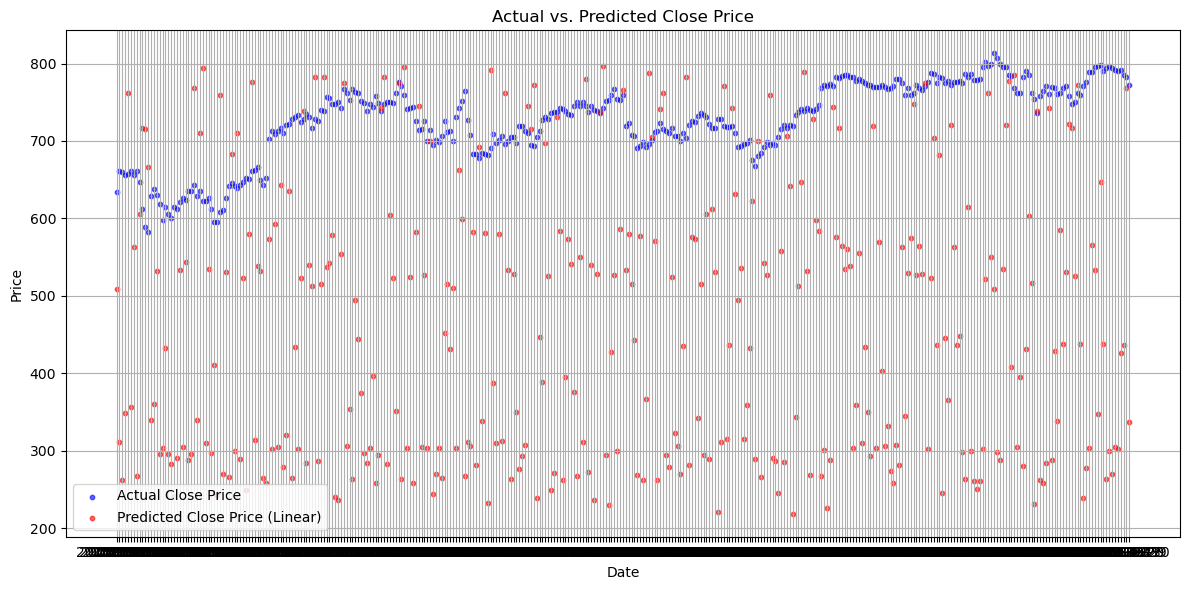

In [262]:
plt.figure(figsize=(12, 6))
plt.scatter(df_subset['date'], df_subset['close'], color='blue', label='Actual Close Price', alpha=0.6, s=10)
plt.scatter(df_subset['date'], df_subset['predicted_close_linear'], color='red', label='Predicted Close Price (Linear)', alpha=0.6, s=10)

# Add labels and titless
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Close Price')
plt.legend()
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

# Polynmial Regression

we are using a more powerful model so to get more better results

In [228]:
df2 = df1
df2 = df[df['symbol'] == 'GOOG']
df2 = df2.dropna()
X = df2.drop(columns=['date', 'symbol', 'close'])
y = df2['close']
df = df2[df['close'].notna()]
y = y[X.index]#synchronise our rows as we have removed ths column with NaN
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=2) # degree determines in the the polynomial degree
X_poly = poly.fit_transform(X)

In [229]:
poly = PolynomialFeatures(degree=2)  # consider playing around with the degree
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [230]:
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)

LinearRegression()

In [231]:
X_test_poly[1]

array([ 1.00000000e+00,  2.95991047e+02,  2.93475479e+02,  2.97111868e+02,
        4.35160000e+06, -1.65809362e+07,  2.94878568e+02,  6.35389597e+01,
        4.98249984e+01,  1.76902918e+02, -7.72529210e+01,  2.95293674e+02,
        7.10454293e+02,  2.01000000e+03,  2.94478683e+02,  8.76106998e+04,
        8.68661142e+04,  8.79424529e+04,  1.28803464e+09, -4.90780866e+09,
        8.72814159e+04,  1.88069632e+04,  1.47477534e+04,  5.23616799e+04,
       -2.28661730e+04,  8.74042836e+04,  2.10288110e+05,  5.94942004e+05,
        8.71630536e+04,  8.61278567e+04,  8.71950478e+04,  1.27708789e+09,
       -4.86609819e+09,  8.65396288e+04,  1.86471266e+04,  1.46224153e+04,
        5.19166685e+04, -2.26718380e+04,  8.66614523e+04,  2.08500914e+05,
        5.89885713e+05,  8.64222724e+04,  8.82754623e+04,  1.29291201e+09,
       -4.92639293e+09,  8.76119221e+04,  1.88781790e+04,  1.48035984e+04,
        5.25599564e+04, -2.29527597e+04,  8.77352550e+04,  2.11084402e+05,
        5.97194855e+05,  

In [232]:
y_pred_poly = lr_poly.predict(X_test_poly)
print("RMSE for Polynomial Regression:", np.sqrt(mean_squared_error(y_test, y_pred_poly)))

RMSE for Polynomial Regression: 0.0008834381024597302


In [233]:
X_test_poly
y_pred_poly = lr_poly.predict(X_test_poly)


In [234]:
y_pred_poly 

array([549.8434497 , 294.04873036, 515.73665595, 515.682182  ,
       289.06656552, 431.57730144, 271.47813386, 283.93139328,
       351.70259799, 349.66998018, 288.24499478, 263.43267244,
       303.59284118, 562.59858209, 314.24264495, 354.33283591,
       302.47674275, 789.26973863, 344.80251251, 540.31096526,
       331.70721602, 523.07515873, 606.25147848, 270.63546275,
       375.43350355, 262.44680637, 306.58671692, 710.36076257,
       226.46244014, 239.21276786, 287.18394037, 282.68717275,
       783.00898778, 374.33625383, 301.44563141, 288.09987632,
       218.92568194, 428.58476748, 289.26613458, 394.96555953,
       443.54192875, 264.21754717, 699.99087424, 739.30868038,
       303.7220676 , 776.85766937, 294.7805671 , 279.04927937,
       298.31156091, 581.06643776, 527.2013938 , 522.61790139,
       580.38908953, 266.00804546, 742.74076371, 541.08146892,
       268.10020856, 315.56224501, 265.00089207, 728.57991699,
       267.97951832, 295.87656095, 573.48789526, 262.65

In [235]:
df2['date'] = pd.to_datetime(df['date'])

In [236]:
print(df2['predicted_close_poly'].isnull().sum())
print(df2.columns)

0
Index(['date', 'symbol', 'open', 'close', 'low', 'high', 'volume', 'ADOSC',
       'TP', 'std', 'movingavg', 'BOLU', 'BOLD', 'MEDPRICE',
       'predicted_close_poly', 'decade', 'y_pred_poly'],
      dtype='object')


In [254]:
df2 = df2.dropna(subset=['predicted_close_poly'])


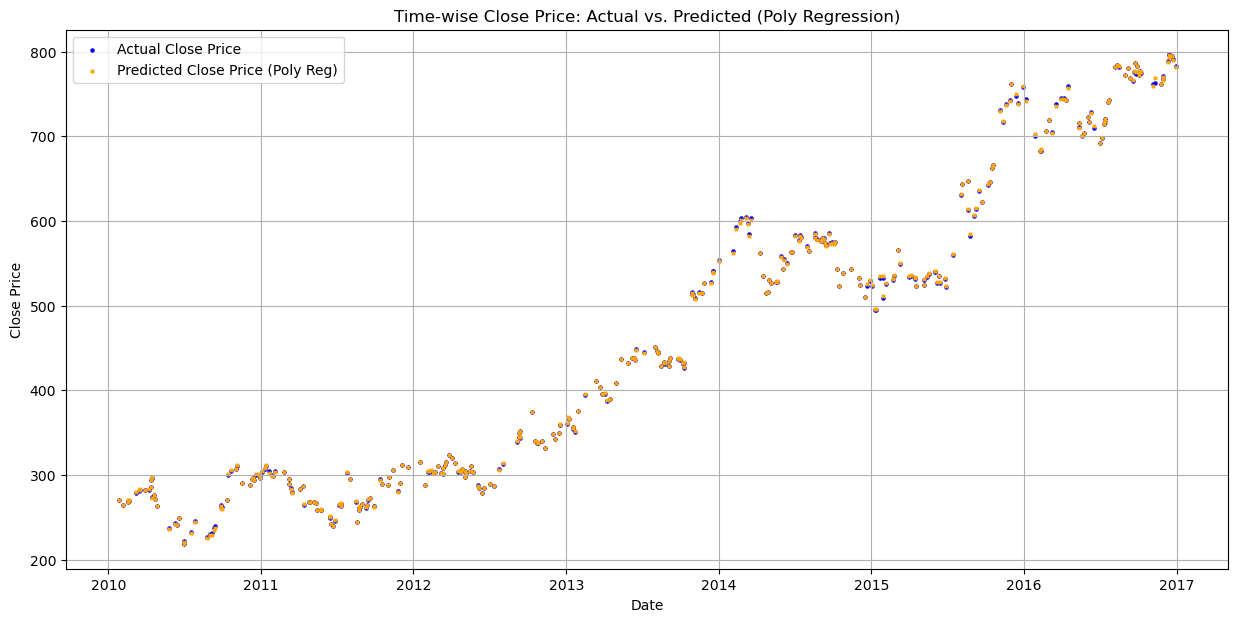

In [238]:
plt.figure(figsize=(15, 7))

# Scatter plot for actual close prices
plt.scatter(df2['date'], df2['close'], label='Actual Close Price', color='blue', s=5)  # 's' is the marker size

# Scatter plot for predicted close prices
plt.scatter(df2['date'], df2['y_pred_poly'], label='Predicted Close Price (Poly Reg)', color='orange', s=5, marker='x')

# Setting the title and labels
plt.title('Time-wise Close Price: Actual vs. Predicted (Poly Regression)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()

plt.grid(True)
plt.show()

In [239]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred_poly)
print("R^2 Score:", score)

R^2 Score: 0.9999999999723638


In [243]:
# Assuming the test set indices align with the original dataframe
df2.loc[X_test.index, 'y_pred_poly'] = y_pred_poly
df2 = df.sort_values(by='date')

In [244]:
df2.drop(columns = ['predicted_close_poly'])

,date,symbol,open,close,low,high,volume,ADOSC,TP,std,movingavg,BOLU,BOLD,MEDPRICE,decade,y_pred_poly
7459,2010-01-26,GOOG,267.980989,270.197698,267.144135,273.774304,8743600.0,-1.351096e+07,270.372046,58.022623,43.097721,159.142968,-72.947525,270.459219,2010,270.418568
11203,2010-02-05,GOOG,263.213861,264.653469,260.254963,265.754332,6335600.0,2.614969e+07,263.554254,56.634274,41.982032,155.250579,-71.286516,263.004647,2010,264.691340
14011,2010-02-16,GOOG,267.433045,269.639775,266.152861,271.049506,7336100.0,3.243390e+07,268.947381,58.032020,43.365347,159.429387,-72.698692,268.601184,2010,270.027958
14479,2010-02-17,GOOG,269.988469,268.100557,267.801668,270.685858,4074500.0,2.164053e+07,268.862694,58.212275,43.783104,160.207653,-72.641445,269.243763,2010,268.508045
15415,2010-02-19,GOOG,269.256230,269.370793,268.842777,270.999702,5125300.0,4.367081e+06,269.737757,57.981552,43.818617,159.781721,-72.144487,269.921239,2010,269.851756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844963,2016-12-13,GOOG,793.900024,796.099976,793.340027,804.380005,2119800.0,1.957846e+06,797.940003,167.145399,90.290833,424.581632,-243.999965,798.860016,2010,794.269316
845463,2016-12-14,GOOG,797.400024,797.070007,794.010010,804.000000,1664500.0,-2.514750e+07,798.360006,167.241288,89.994500,424.477076,-244.488076,799.005005,2010,795.687868
847963,2016-12-21,GOOG,795.840027,794.559998,787.099976,796.676025,1208700.0,-6.695375e+06,792.778666,166.089762,89.571267,421.750791,-242.608257,791.888000,2010,795.027104
848463,2016-12-22,GOOG,792.359985,791.260010,788.580017,793.320007,969100.0,-1.022119e+07,791.053345,165.771911,89.034501,420.578323,-242.509321,790.950012,2010,790.679241
